<center>
    <img src="images/ASA_Mobile_123.png" width="300" alt="ASA Mobile Companies Ranking 123 logo" />
</center>

# Mobile Communication Companies in Georgia ranked by Attractiveness Score

Lets explore which mobile communication companies are operating in Georgia, how many subscribers do each of them serve, and how attractive each of them is.

Here an attractiveness of a company, or more specifically the "Attractiveness Score" which is defined later in this document, measures an ability of company to attract and retain subscribers. 

Finally, best performing companies according to the "Attractiveness Score", for each year we have data for, and per category of subscribers (categories being "All subscribers" combined, "Legal Entity subscribers" and "Natural Person subscribers"), are found via this analysis and are listed towards the end of this notebook.


In [1]:
from datetime import datetime, timedelta
nb_st = datetime.utcnow()
print(f"\nNotebook START time: {nb_st} UTC\n")


Notebook START time: 2022-06-16 10:39:32.704059 UTC



In [2]:
%%HTML
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Python Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Python Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide();
    $('div.input:contains("%%HTML")').removeClass( "input")
  });
</script>
<form action="javascript:code_toggle()">
  <input type="submit" id="toggleButton" value="Show Python Code">
</form>

## Index

- [Data](#Data)
  - [Import the data](#Import-the-data)
  - [Definition of number of subscribers](#Definition-of-number-of-subscribers-in-the-context-of-the-given-data:)
  - [Interval of time covered by the data](#Interval-of-time-covered-by-the-given-data)
  - [Mobile Companies operationg in Georgia](#Mobile-Companies-operationg-in-Georgia)
  - [Date of merger of the Silknet and Geocell](#Date-of-merger-of-the-Silknet-and-Geocell)
  - [Date of COVID-19 Start](#Date-of-COVID-19-Start)
- [Total number of subscribers](#Total-number-of-subscribers)
- [Number of subscribers by company](#Number-of-subscribers-by-company)
  - [All subscribers](#All-subscribers)
  - [Legal Entity subscribers](#Legal-Entity-subscribers)
  - [Natural Person subscribers](#Natural-Person-subscribers)
- [Trend of number of sybscribers by company](#Trend-of-number-of-sybscribers-by-company)
  - [All subscribers trend](#All-subscribers-trend)
  - [Legal Entity subscribers trend](#Legal-Entity-subscribers-trend)
  - [Natural Person subscribers trend](#Natural-Person-subscribers-trend)
- [Performance of Companies](#Performance-of-Companies)
- [Share Of Subscribers by company](#Share-Of-Subscribers-by-company)
  - [All subscribers share](#All-subscribers-share)
  - [Legal Entity subscribers share](#Legal-Entity-subscribers-share)
  - [Natural Person subscribers share](#Natural-Person-subscribers-share)
- [The formula of The Atractiveness Score](#The-formula-of-The-Atractiveness-Score)
- [Monthly Attractiveness Scores of Companies](#Monthly-Attractiveness-Scores-of-Companies)
  - [Monthly Scores for All subscribers](#Monthly-Scores-for-All-subscribers)
  - [Monthly Scores for Legal Entity subscribers](#Monthly-Scores-for-Legal-Entity-subscribers)
  - [Monthly Scores for Natural Person subscribers](#Monthly-Scores-for-Natural-Person-subscribers)
- [Yearly Attractiveness Scores of Companies](#Yearly-Attractiveness-Scores-of-Companies)
  - [Yearly Scores for All subscribers](#Yearly-Scores-for-All-subscribers)
  - [Yearly Scores for Legal Entity subscribers](#Yearly-Scores-for-Legal-Entity-subscribers)
  - [Yearly Scores for Natural Person subscribers](#Yearly-Scores-for-Natural-Person-subscribers)
- [Top Companies by Attractiveness Score](#Top-Companies-by-Attractiveness-Score)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
sns.set_theme()

# Data

The data used in this analysis is retrieved on May 18, 2022 from the website of the Communications Commission of Georgia: [comcom.ge](https://comcom.ge).


## Import the data

In [4]:
def import_data_en(excel_path: str) -> pd.DataFrame:
    df = (pd
          .read_excel(excel_path)
          .sort_values("Month", ascending=True)
          .reset_index(drop=True))
    # English version of the original source contains some
    # untranslated names, fixing it here:
    df = df.replace({
        'სილქნეტი': 'Silknet',
        'გლობალ სელ': 'Globalcell',
        'ჯიმობაილ': 'Gmobile',
        'ასანეტ': 'Asanet'  # AKA gosim
    })
    # the 'Subscribers' column actually contains subscriber information
    # per company, renaming it accordingly:
    df.rename({'Subscribers': 'CompanySubscribers'}, axis=1, inplace=True)
    return df

In [5]:
all_df = import_data_en('data/EN/all.xlsx')
legal_entities_df = import_data_en('data/EN/legal_entities.xlsx')
natural_persons_df = import_data_en('data/EN/natural_persons.xlsx')

all_df.head()

,Month,Company,CompanySubscribers
0,2010-01-01,Veon Georgia,352683
1,2010-01-01,Magticom,1365722
2,2010-01-01,Geocell,1390239
3,2010-02-01,Veon Georgia,383348
4,2010-02-01,Magticom,1335633


## Definition of number of subscribers in the context of the given data:

Total Number of subscribers (sim cards), which, during the corresponding period (month, quarter), have used company services at least once (made or received call, sent or received SMS/MMS), used internet or other value added service, or were charged a subscription fee (including company employees and excluding test cards).

## Interval of time covered by the given data

In [6]:
start_month, end_month = all_df['Month'].min(), all_df['Month'].max()

print("\nGiven data covers the interval of time "
      f"from {start_month:%B %Y} to {end_month:%B %Y} (inclusive).\n")


Given data covers the interval of time from January 2010 to February 2022 (inclusive).



## Mobile Companies operationg in Georgia

List of companies with their respective number of active months during the time period covered by the given data:

In [7]:
display(all_df['Company']
        .value_counts()
        .reset_index()
        .rename({"Company": "Active Months", "index": "Company"}, axis=1))

,Company,Active Months
0,Veon Georgia,146
1,Magticom,146
2,Silknet,122
3,Geocell,106
4,Globalcell,86
5,Gmobile,41
6,Asanet,1


In [8]:
company_name_list = all_df['Company'].value_counts().index.to_list()

company_colors = {
    'Veon Georgia': 'y',
    'Magticom': 'r',
    'Silknet': 'tab:blue',
    'Geocell': 'tab:purple',
    'Globalcell': 'tab:orange',
    'Gmobile': 'tab:brown',
    'Asanet': 'tab:green',
}
company_color_palette = [
    company_colors[company] for company in company_name_list]
print("\nAttempting to make colors of companies similar to their "
      "respective brand/logo colors: \n")
display(list(zip(company_name_list, company_color_palette)))


Attempting to make colors of companies similar to their respective brand/logo colors: 



[('Veon Georgia', 'y'),
 ('Magticom', 'r'),
 ('Silknet', 'tab:blue'),
 ('Geocell', 'tab:purple'),
 ('Globalcell', 'tab:orange'),
 ('Gmobile', 'tab:brown'),
 ('Asanet', 'tab:green')]

## Date of merger of the Silknet and Geocell

In [9]:
Geocell_last_month = (all_df
                      .loc[all_df['Company']=='Geocell', 'Month']
                      .tail(1)
                      .item())
Silknet_Geocell_merger_month = (all_df
                                .loc[all_df['Month']>Geocell_last_month,
                                     'Month']
                                .head(1)
                                .item())


def get_Silknet_before_merger_subscribers(df: pd.DataFrame) -> int:
    return df.loc[
        (df['Month']==Geocell_last_month) & (df['Company']=='Silknet'),
        'CompanySubscribers'].item()


def get_Silknet_Geocell_merger_subscribers(df: pd.DataFrame) -> int:
    return df.loc[(df['Month']==Silknet_Geocell_merger_month)
                  & (df['Company']=='Silknet'), 'CompanySubscribers'].item()


print(f'\n{Silknet_Geocell_merger_month:%B %Y} is the date of Merger'
      ' of the Silknet and Geocell.\n')


November 2018 is the date of Merger of the Silknet and Geocell.



## Date of COVID-19 Start

In [10]:
# December 12, 2019:
# A cluster of patients in Wuhan, Hubei Providence, China 
# begin to experience shortness of breath and fever.
COVID19_start_date = pd.Timestamp(year=2019, month=12, day=12)

# February 26, 2020:
# Georgia officially confirmed its first COVID-19 case.
# Citizen of Georgia who returned from Iran came back
# to the Georgian border via Azerbaijan.
COVID19_start_date_Georgia = pd.Timestamp(year=2020, month=2, day=26)


def get_total_subscribers_on_the_date(df: pd.DataFrame,
                                      date: pd.Timestamp) -> int:
    # FIXME ignoring edge cases:
    observed_date_before = df.loc[(df['Month'] <= date),
                                  'Month'].tail(1).item()
    observed_date_after = df.loc[(df['Month'] >= date),
                                 'Month'].head(1).item()
    subscribers_before = df.loc[(df['Month'] == observed_date_before),
                                'CompanySubscribers'].sum()
    subscribers_after = df.loc[(df['Month'] == observed_date_after),
                               'CompanySubscribers'].sum()
    return int((subscribers_before+subscribers_after) / 2)

print(f"COVID-19 start dates:\n - {COVID19_start_date:%B %d, %Y}: China")
print(f" - {COVID19_start_date_Georgia:%B %d, %Y}: Georiga")

COVID-19 start dates:
 - December 12, 2019: China
 - February 26, 2020: Georiga


# Total number of subscribers


In [11]:
years_df = (all_df
            .assign(Year=lambda df: [x.year for x in df['Month']])
            .groupby('Year').first().reset_index()
            .assign(MonthNum=lambda df: df['Month'].astype(int)))

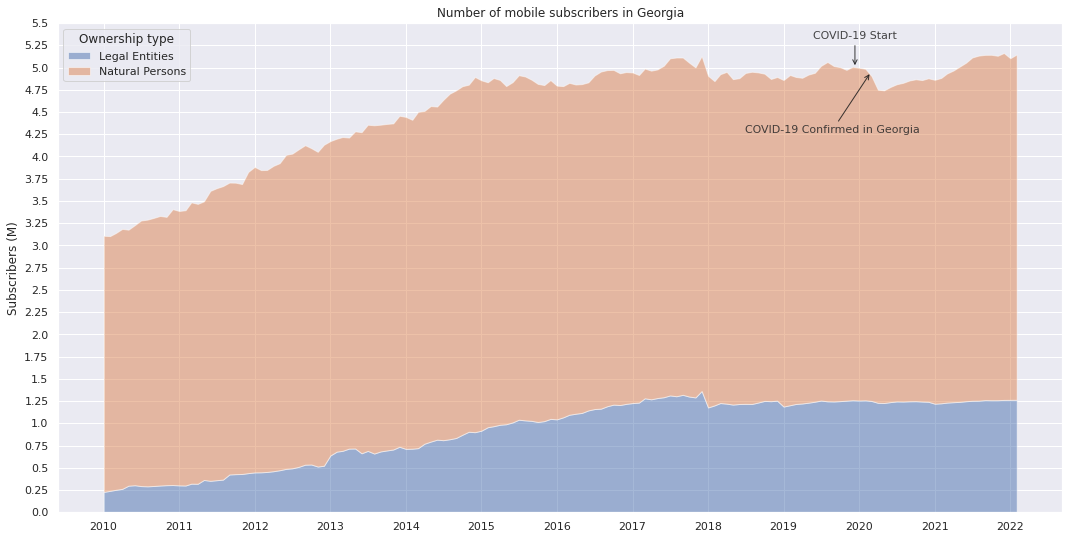

In [12]:
fig = plt.figure(figsize=(18, 9))
plt.title("Number of mobile subscribers in Georgia")
plt.stackplot(
    all_df['Month'].unique(),
    legal_entities_df.groupby("Month").sum()['CompanySubscribers'],
    natural_persons_df.groupby("Month").sum()['CompanySubscribers'],
    labels=['Legal Entities', 'Natural Persons'],
    alpha=0.5
)
COVID19_xy = np.array([
    COVID19_start_date,
    get_total_subscribers_on_the_date(all_df, COVID19_start_date)
])
COVID19_Georgia_xy = np.array([
    COVID19_start_date_Georgia,
    get_total_subscribers_on_the_date(all_df, COVID19_start_date_Georgia)
])
plt.gca().annotate(
    "COVID-19 Start",
    xy=COVID19_xy,
    xytext=COVID19_xy + np.array([pd.Timedelta(days=0), 3.5e5]),
    arrowprops={'arrowstyle': '->', 'fc': 'k', 'ec': 'k', 'alpha': 0.85},
    fontsize=11, va="center", ha="center", alpha=0.85
)
plt.gca().annotate(
    "COVID-19 Confirmed in Georgia",
    xy=COVID19_Georgia_xy,
    xytext=COVID19_Georgia_xy - np.array([pd.Timedelta(days=185), 6.5e5]),
    arrowprops={'arrowstyle': '->', 'fc': 'k', 'ec': 'k', 'alpha': 0.85},
    fontsize=11, va="center", ha="center", alpha=0.85
)
plt.gca().set(
    yticks=np.arange(0, 5.6, 0.25) * 1e6,
    yticklabels=np.arange(0, 5.6, 0.25), ylabel='Subscribers (M)',
    xticks=years_df['Month'], xticklabels=years_df['Year'], xlabel='')
plt.legend(loc='upper left', title='Ownership type')
plt.show()
plt.close(fig)

# Number of subscribers by company

## All subscribers


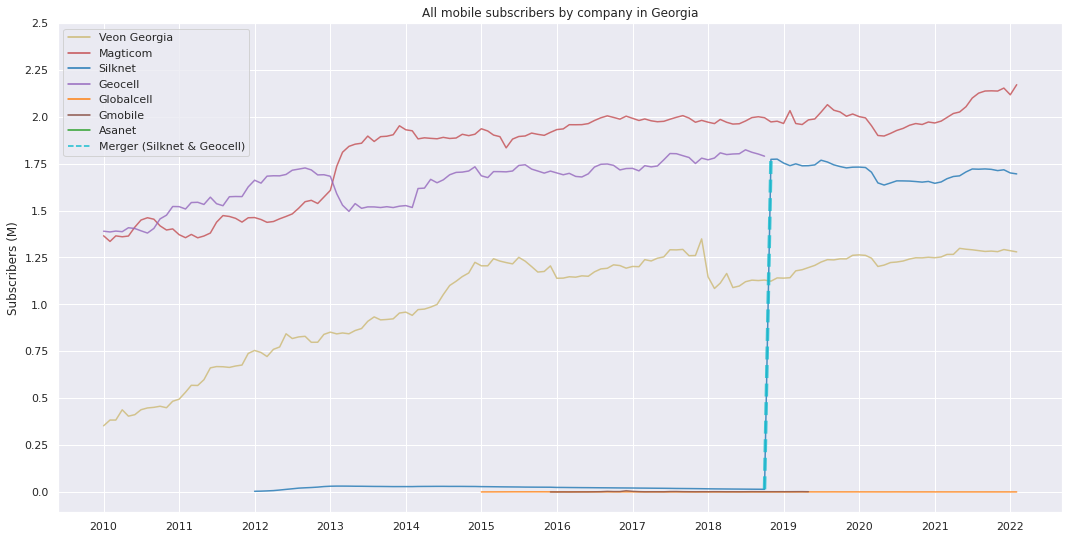

In [13]:
def plot_number_of_subscribers_by_company(
        df: pd.DataFrame(),
        title: str,
        yticks_range: np.ndarray = np.arange(0, 2.75, 0.25)):
    companies = [
        company
        for company in company_name_list if company in df['Company'].unique()]
    company_color_palette = [
        company_colors[company]
        for company in company_name_list if company in companies]
    fig=plt.figure(figsize=(18, 9))
    plt.title(title)
    ax = sns.lineplot(
        data=df,
        x='Month',
        y='CompanySubscribers',
        hue='Company',
        hue_order=companies,
        palette=company_color_palette,
        alpha=0.8,
    )
    with plt.rc_context({'lines.linestyle': '--'}):
        sns.lineplot(
            x=[Geocell_last_month, Silknet_Geocell_merger_month],
            y=[get_Silknet_before_merger_subscribers(df),
               get_Silknet_Geocell_merger_subscribers(df)],
            hue=['Merger (Silknet & Geocell)', 'Merger (Silknet & Geocell)'],
            palette=['tab:cyan'],
            alpha=0.8,
            linewidth=3.5,
            ax=ax
        )
    ax.set(
        yticks=yticks_range * 1e6,
        yticklabels=np.round(yticks_range, decimals=2),
        ylabel='Subscribers (M)',
        xticks=years_df['Month'], xticklabels=years_df['Year'], xlabel='')
    plt.legend(loc='upper left')
    plt.show()
    plt.close(fig)


plot_number_of_subscribers_by_company(
    all_df,
    "All mobile subscribers by company in Georgia")

## Legal Entity subscribers

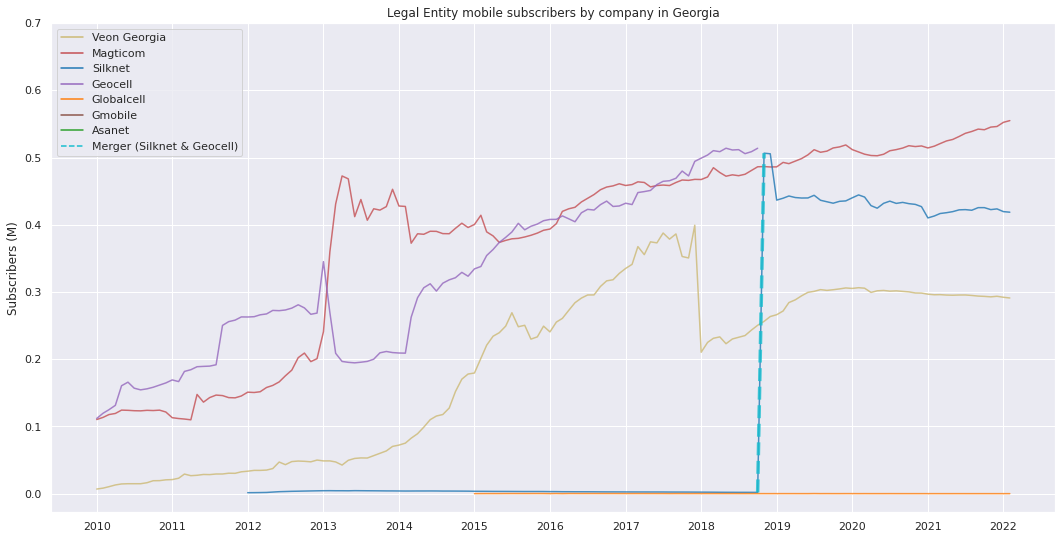

In [14]:
plot_number_of_subscribers_by_company(
    legal_entities_df,
    "Legal Entity mobile subscribers by company in Georgia",
    yticks_range=np.arange(0, 0.8, 0.1))

## Natural Person subscribers

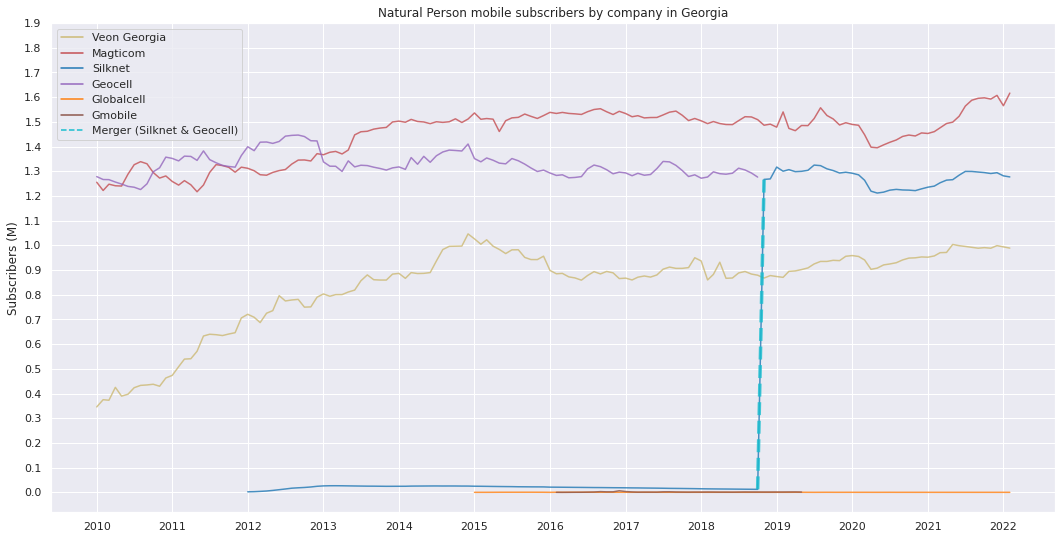

In [15]:
plot_number_of_subscribers_by_company(
    natural_persons_df,
    "Natural Person mobile subscribers by company in Georgia",
    yticks_range=np.arange(0, 2, 0.1))

# Trend of number of sybscribers by company

## All subscribers trend

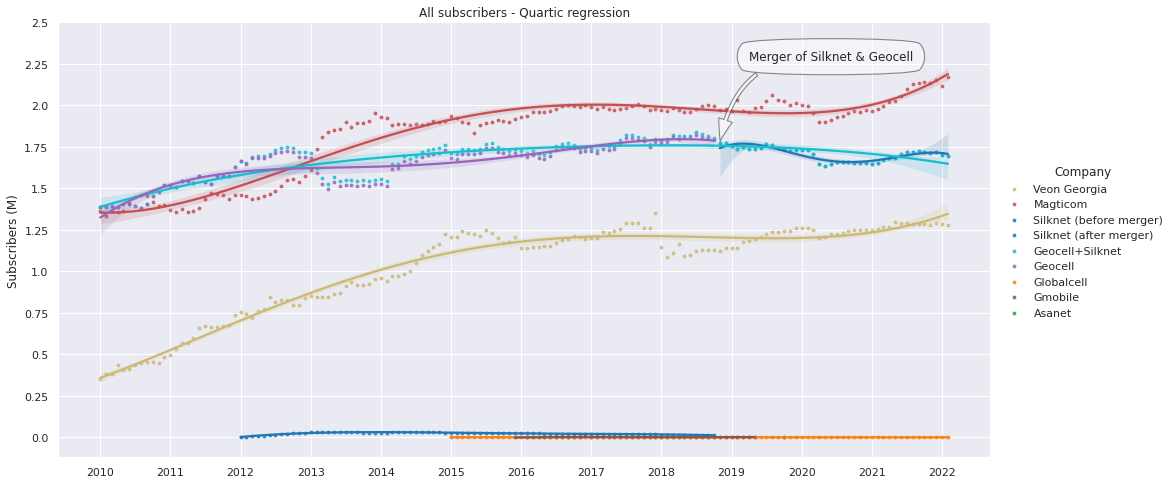

In [16]:
def plot_trend_by_company_regression(
        subscribers_df: pd.DataFrame,
        title: str,
        yticks_range: np.ndarray = np.arange(0, 2.75, 0.25),
        merger_v_offset=5.2e5,
        regression_order=4):
    companies = [
        company
        for company in company_name_list
        if company in subscribers_df['Company'].unique()]
    company_color_palette=[
        company_colors[company]
        for company in company_name_list if company in companies]
    silknet_idx = companies.index('Silknet')
    companies[silknet_idx:silknet_idx+1] = [
        'Silknet (before merger)', 'Silknet (after merger)', 'Geocell+Silknet']
    company_color_palette[silknet_idx:silknet_idx+1] = [
        'tab:blue', 'tab:blue', 'tab:cyan']
    df = pd.concat([
        subscribers_df,
        subscribers_df
            .loc[(subscribers_df['Company']=='Silknet')
                 | (subscribers_df['Company']=='Geocell')]
            .groupby('Month').sum().reset_index()
            .assign(Company='Geocell+Silknet'),
    ], axis=0, ignore_index=True)
    df.loc[(df['Company']=='Silknet')
           & (df['Month']<Silknet_Geocell_merger_month),
           'Company'] = 'Silknet (before merger)'
    df.loc[(df['Company']=='Silknet'), 'Company'] = 'Silknet (after merger)'
    
    df = df.assign(MonthNum=lambda df: df['Month'].astype(int))
    
    grid = sns.lmplot(
        data=df,
        x='MonthNum',
        y='CompanySubscribers',
        hue='Company',
        hue_order=companies,
        palette=company_color_palette,
        height=7, aspect=2,
        ci=99,
        scatter_kws={"s": 8},
        order=regression_order,
    )
    plt.title(title + " - {} regression".format(
        {
            1: 'Linear',
            2: 'Quadratic',
            3: 'Cubic',
            4: 'Quartic',
            5: 'Quintic',
            6: 'Sextic',
        }[regression_order]))
    
    grid.ax.set(
        yticks=yticks_range * 1e6,
        yticklabels=np.round(yticks_range, decimals=2),
        ylabel='Subscribers (M)',
        xticks=years_df['MonthNum'], xticklabels=years_df['Year'], xlabel='')
    
    merger_xy = np.array([
        df.loc[df['Month']==Silknet_Geocell_merger_month,
               'MonthNum'].head(1).item(),
        get_Silknet_Geocell_merger_subscribers(subscribers_df)])
    
    grid.ax.annotate(
        "Merger of Silknet & Geocell",
        xy=merger_xy,
        xytext=merger_xy + np.array([5e16, merger_v_offset]),
        arrowprops={
            'arrowstyle': ('simple,head_length=1.8,'
                           'head_width=1.2,tail_width=0.3'),
            'connectionstyle': 'arc3,rad=0.45',
            'fc': 'w', 'ec': 'k', 'lw': 1.1, 'alpha': 0.5,
        },
        bbox={'boxstyle': 'round4', 'alpha': 0.5, 'pad': 1.1,
              'fc': 'w', 'ec': 'k', 'lw': 1.1},
        fontsize=12, va="center", ha="center",
    )
    plt.show()
    plt.close()

plot_trend_by_company_regression(all_df, "All subscribers", regression_order=4)

## Legal Entity subscribers trend

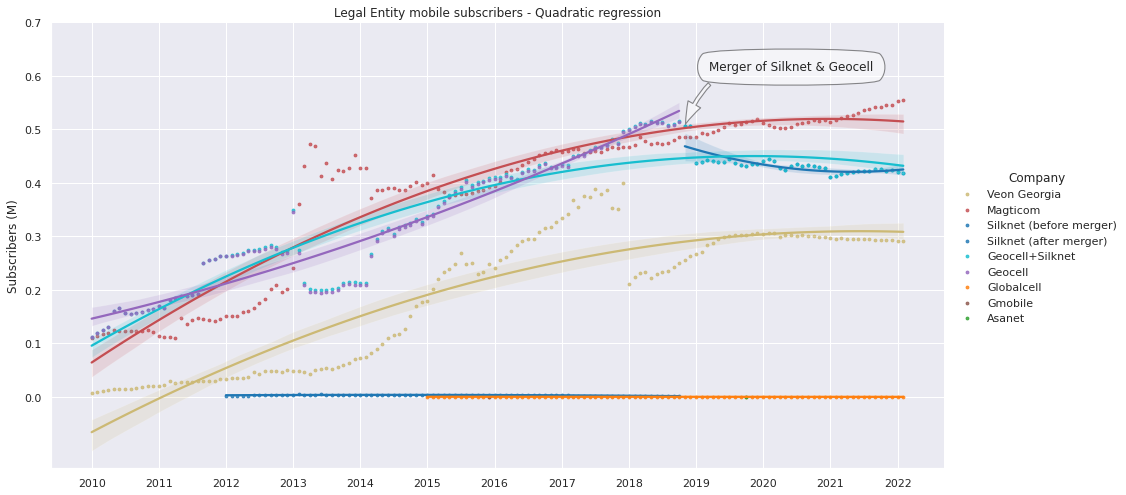

In [17]:
plot_trend_by_company_regression(
    legal_entities_df, "Legal Entity mobile subscribers",
    yticks_range=np.arange(0, 0.8, 0.1), merger_v_offset=1.1e5,
    regression_order=2)

## Natural Person subscribers trend

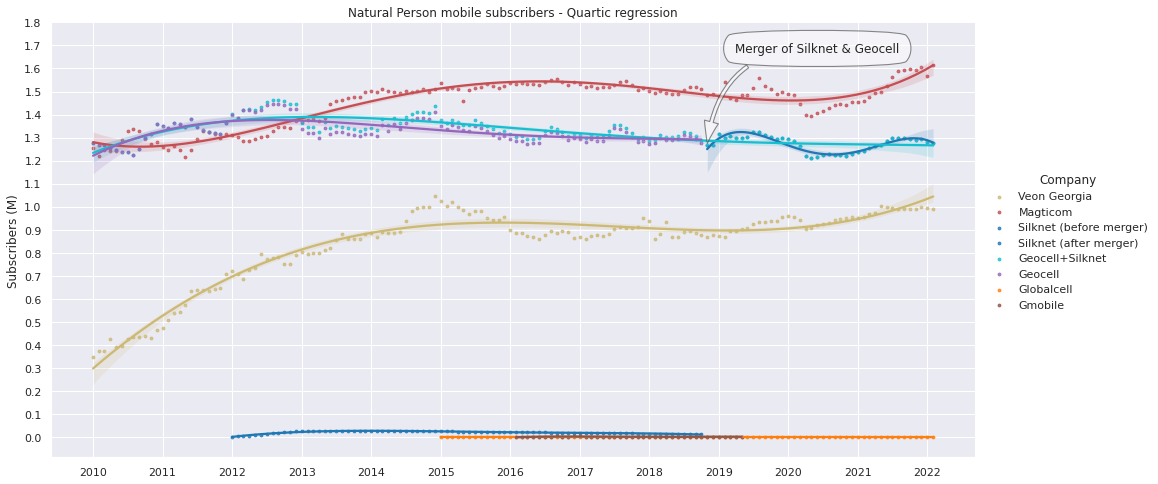

In [18]:
plot_trend_by_company_regression(
    natural_persons_df, "Natural Person mobile subscribers",
    yticks_range=np.arange(0, 1.9, 0.1), merger_v_offset=4.2e5,
    regression_order=4)

# Performance of Companies



In [19]:
def get_total_subscribers_df(df: pd.DataFrame) -> pd.DataFrame:
    return (df
            .groupby('Month')['CompanySubscribers']
            .sum()
            .reset_index()
            .rename({'CompanySubscribers': 'MarketSubscribers'}, axis=1)
            .assign(
                MarketSubscribersDelta=lambda df: np.concatenate([
                    np.array([0]),
                    df.iloc[1:]['MarketSubscribers'].to_numpy()
                    - df.iloc[:-1]['MarketSubscribers'].to_numpy()
                ])
            )
           )


def compute_subscriber_and_market_features(df: pd.DataFrame) -> pd.DataFrame:    
    df = (df
          .join(get_total_subscribers_df(df)[['Month', 'MarketSubscribers',
                                              'MarketSubscribersDelta']]
                .set_index('Month'), on='Month')
          .groupby('Company')
          .apply(lambda group_df: group_df.assign(
              CompanySubscribersDelta=lambda df: np.concatenate([
                  np.array([0]),
                  (df.iloc[1:]['CompanySubscribers'].to_numpy()
                   - df.iloc[:-1]['CompanySubscribers'].to_numpy())
              ])
          ))
          .assign(
              CompanySubscribersShare=lambda df: (df['CompanySubscribers']
                                                  / df['MarketSubscribers']),
              CompanySubscribersShareOld=lambda df: np.concatenate([
                  np.array([0]),
                  df['CompanySubscribersShare'].to_numpy()[:-1]
              ])
          )
         )
    df.loc[(df['Company']=='Silknet')
           & (df['Month']==Silknet_Geocell_merger_month),
           'CompanySubscribersDelta'] = 0  # merger... not an actual growth...
    return df

print("New/Changed columns after applying the "
      "`compute_subscriber_and_market_features()` function to DataFrame:\n-",
      "\n- ".join(list(compute_subscriber_and_market_features(all_df).columns
                       .difference(all_df.columns))))

New/Changed columns after applying the `compute_subscriber_and_market_features()` function to DataFrame:
- CompanySubscribersDelta
- CompanySubscribersShare
- CompanySubscribersShareOld
- MarketSubscribers
- MarketSubscribersDelta


In [20]:
print("\nDescriptive statistics of monthly changes in the number "
      "of All Subscribers:\n")
with pd.option_context('display.float_format', '{:0.2f}'.format):
    display(compute_subscriber_and_market_features(all_df)[[
        'MarketSubscribersDelta', 'CompanySubscribersDelta'
    ]].describe())


Descriptive statistics of monthly changes in the number of All Subscribers:



,MarketSubscribersDelta,CompanySubscribersDelta
count,648.00,648.00
mean,11789.52,3189.55
std,50117.14,21336.14
min,-221244.00,-202065.00
25%,-14333.00,-1159.50
50%,13623.00,13.00
75%,44137.00,8334.75
max,136533.00,128717.00


In [21]:
print("\nDescriptive statistics of monthly changes in the number "
      "of Legal Entity Subscribers:\n")
with pd.option_context('display.float_format', '{:0.2f}'.format):
    display(compute_subscriber_and_market_features(legal_entities_df)[[
        'MarketSubscribersDelta', 'CompanySubscribersDelta'
    ]].describe())


Descriptive statistics of monthly changes in the number of Legal Entity Subscribers:



,MarketSubscribersDelta,CompanySubscribersDelta
count,608.00,608.00
mean,7090.89,1716.18
std,26092.10,13841.48
min,-184415.00,-188934.00
25%,-1151.00,-72.00
50%,6477.50,108.50
75%,16116.00,3833.00
max,115523.00,118730.00


In [22]:
print("\nDescriptive statistics of monthly changes in the number "
      "of Natural Person Subscribers:\n")
with pd.option_context('display.float_format', '{:0.2f}'.format):
    display(compute_subscriber_and_market_features(natural_persons_df)[[
        'MarketSubscribersDelta', 'CompanySubscribersDelta'
    ]].describe())


Descriptive statistics of monthly changes in the number of Natural Person Subscribers:



,MarketSubscribersDelta,CompanySubscribersDelta
count,646.00,646.00
mean,4840.02,1584.16
std,41158.06,16627.51
min,-132445.00,-84790.00
25%,-23975.50,-3381.00
50%,4341.00,-1.00
75%,32419.00,5354.75
max,127319.00,61788.00


# Share Of Subscribers by company

## All subscribers share

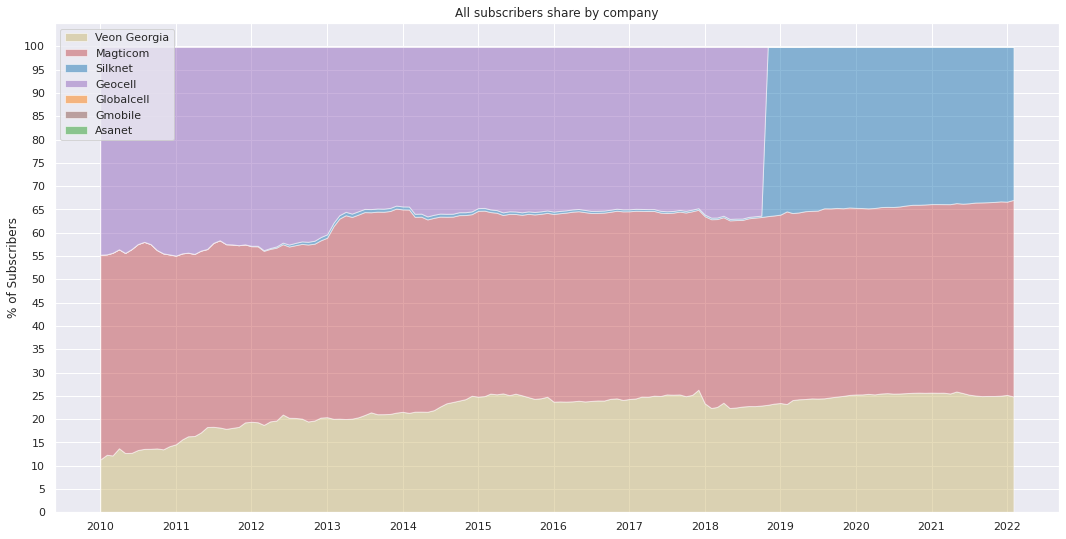

In [23]:
def plot_market_share_of_companies(df: pd.DataFrame, title: str):
    df = compute_subscriber_and_market_features(df)
    
    companies = [
        company for company in company_name_list
        if company in df['Company'].unique()]
    company_color_palette=[
        company_colors[company] for company in company_name_list
        if company in companies]
    
    company_subscribers = (df[['Month','Company','CompanySubscribersShare']]
                           .pivot(index='Month',columns='Company')
                           .T.reset_index(drop=True, level=0).T
                           .fillna(0)[companies]
                           .to_dict(orient='list')
                          )
    
    fig=plt.figure(figsize=(18,9))
    plt.title(title)
    plt.stackplot(
        df['Month'].unique(),
        company_subscribers.values(),
        labels=company_subscribers.keys(),
        colors=company_color_palette,
        alpha=0.5
    )
    plt.gca().set(
        yticks=np.arange(0, 1.01, 0.05), yticklabels=np.arange(0, 101, 5),
        ylabel='% of Subscribers',
        xticks=years_df['Month'], xticklabels=years_df['Year'], xlabel='')
    plt.legend(loc='upper left')
    plt.show()
    plt.close(fig)


plot_market_share_of_companies(all_df, "All subscribers share by company")

## Legal Entity subscribers share

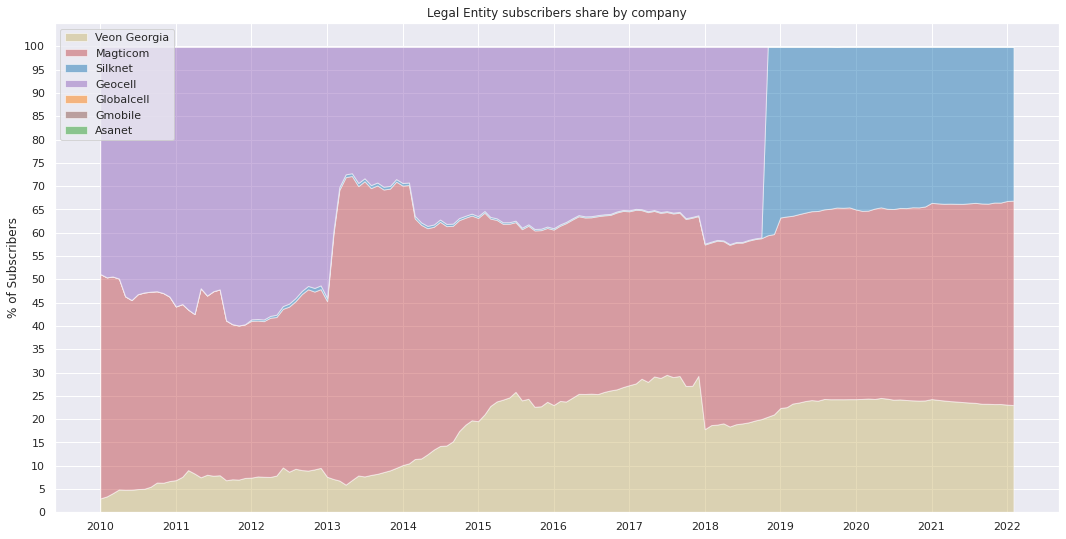

In [24]:
plot_market_share_of_companies(legal_entities_df,
                               "Legal Entity subscribers share by company")

## Natural Person subscribers share

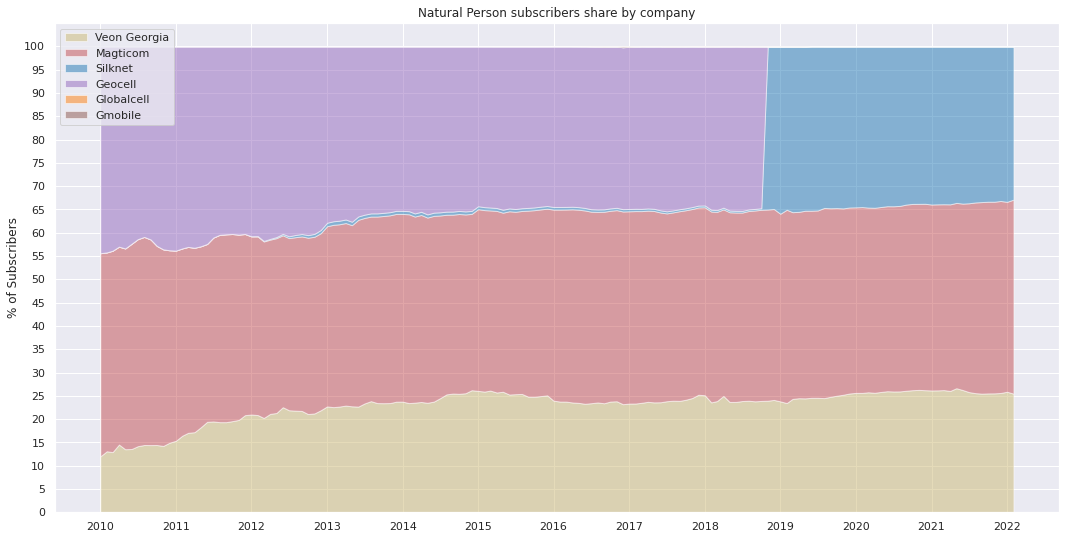

In [25]:
plot_market_share_of_companies(natural_persons_df,
                               "Natural Person subscribers share by company")

# The formula of The Atractiveness Score


_NOTE: This is a very simple and straightforward formula, so I did not attempt to research if this or variations of it already exist, I just created it independently. If the formula is familiar to you from any other credible sources, please provide your feedback by the means indicated in the end of this notebook in order for me to give a due credit to whoever might be using the exact same formula earlier._


"Attractiveness Score" as used in this notebook is intended to be a company performance metric measuring an ability of a company to literally attract subscribers and further retain them, generating a growth of the number of its subscribers in the process.

First, let's define an "Attractiveness Score" of a company in terms of the variable/feature names available and computed in this notebook:

`AttractivenessScore = CompanySubscribersDelta - (0.5 * ('CompanySubscribersShareOld' + 'CompanySubscribersShare') * MarketSubscribersDelta)`

Where the `CompanySubscribersDelta` is a change in number of subscribers of a company in a given period (Month/Year), the `MarketSubscribersDelta` is a change in number of subscribers in the total market in the same period and the `0.5 * ('CompanySubscribersShareOld' + 'CompanySubscribersShare')` is an average share of subscribers of a company out of the total market in the same period.

Second, let's define mathematically the same formula for the sake of clarity:

Let $n^c$ be a number of subscribers of a company and let $n^m$ be a number of total subscribers in the market (i.e. sum of subscribers of all companies in the market). Then we can define the $Atractiveness Score$ of a company for any time period $T$, $Atractiveness Score_T$, as follows:

$\displaystyle\Large Atractiveness Score_T = \sum_{i=1}^{N}{(n^c_{t_i}-n^c_{t_{i-1}}) - \frac{1}{2}(\frac{n^c_{t_{i-1}}}{n^m_{t_{i-1}}}+\frac{n^c_{t_i}}{n^m_{t_i}})(n^m_{t_{i}}-n^m_{t_{i-1}})}$

where $T$ is a given time period (Month/Quarter,Year etc.) for which the score is calculated;  $N>0,\;N\in\mathbb{N}$ is a number of observations made within the $T$ time period; $\{t_1,t_2,t_3,,t_N\}\in{T}$ are respective times of each observation during the time period; $i>j \iff t_i > t_j$ i.e. observation times are indexed from oldest to newest; $n^{c_{t_i}}\in\mathbb{N},\;n^{c_{t_i}}\ge{0}$ is an observed number of subscribers of a company for the respective $t_i$ time; $n^m_{t_i}\in\mathbb{N},\;n^m_{t_i}\ge{0}$ is an observed total number of subscribers in the market for the respective $t_i$ time;


By denoting $\Delta n^c_{t_i}=(n^c_{t_i}-n^c_{t_{i-1}}),\;\Delta n^m_{t_i}=(n^m_{t_i}-n^m_{t_{i-1}})$ and $\bar{s}^c_{t_i}=\frac{1}{2}(\frac{n^c_{t_{i-1}}}{n^m_{t_{i-1}}}+\frac{n^c_{t_i}}{n^m_{t_i}})$ the above formula becomes:

$\displaystyle\Large Atractiveness Score_T = \sum_{i=1}^{N}{\Delta n^c_{t_i} - \bar{s}^c_{t_i}\Delta n^m_{t_i}}$


Finally, going back from the mathematical formula to the variable/feature names actually used in this notebook, the correspondence between the two is as follows:

- `CompanySubscribersDelta`$\;\iff\;\Delta n^c_{t_i}$
- `MarketSubscribersDelta`$\;\iff\;\Delta n^m_{t_i}$
- `0.5 * ('CompanySubscribersShareOld' + 'CompanySubscribersShare')`$\;\iff\;\bar{s}^c_{t_i}$

I added the $\Delta n^c_{t_i}$ component to the formula for an obvious reasons, as it is a change in number of subscribers of a company, which should be by definition one of the best indicators of attractiveness of a company, but it can contain noises, such as noises originated from growing or shrinking of the market itself (i.e. change in total number of subscribers in the market), so I added the $\;-\bar{s}^c_{t_i}\Delta n^m_{t_i}$ component of the formula with the purpose to absorb some of those noises and yield more accurate metric better focusing on the portion of a change in number of subscribers which is actually driven by the attractiveness of the company itself and not by external factors like shrinking or groving market. Assumption behind this part of the formula is that in the events of growing or shrinking of the market if the companies are equally attractive then they would grow or shrink proportionally.

This formula is influenced by the data given in this analysis, as it was made speciphically for this data, which contains a limited information (i.e. mainly a number of subscribers), the intention was to make formula able to extract valuable insights from the given data. Although we cannot access directly performances of companies in the _PR & marketing_ or _customer satisfaction_ and other areas of their operations just by using this limited data, we still can use the `AttractivenessScore` obtained with this formula as a proxy into those performances combined without need for a more information, and as the formula also cancels some inherent noise of the data, the resulting metric is supposedly more close to a real world performance of the scored companies in terms of attracting subscribers.

In [26]:
def compute_attractiveness_score(df: pd.DataFrame) -> pd.DataFrame:
    return compute_subscriber_and_market_features(df).assign(
        AttractivenessScore = lambda df: (
            df['CompanySubscribersDelta']
            - (0.5 * (df['CompanySubscribersShareOld']
                      + df['CompanySubscribersShare'])
               * df['MarketSubscribersDelta'])
        )
    )

# Monthly Attractiveness Scores of Companies



## Monthly Scores for All subscribers

In [27]:
display(compute_attractiveness_score(all_df)['AttractivenessScore'].describe())

count       648.000000
mean         90.636727
std       18255.137182
min     -176201.147065
25%       -7301.075624
50%         -20.258358
75%        6489.583900
max      120434.423264
Name: AttractivenessScore, dtype: float64

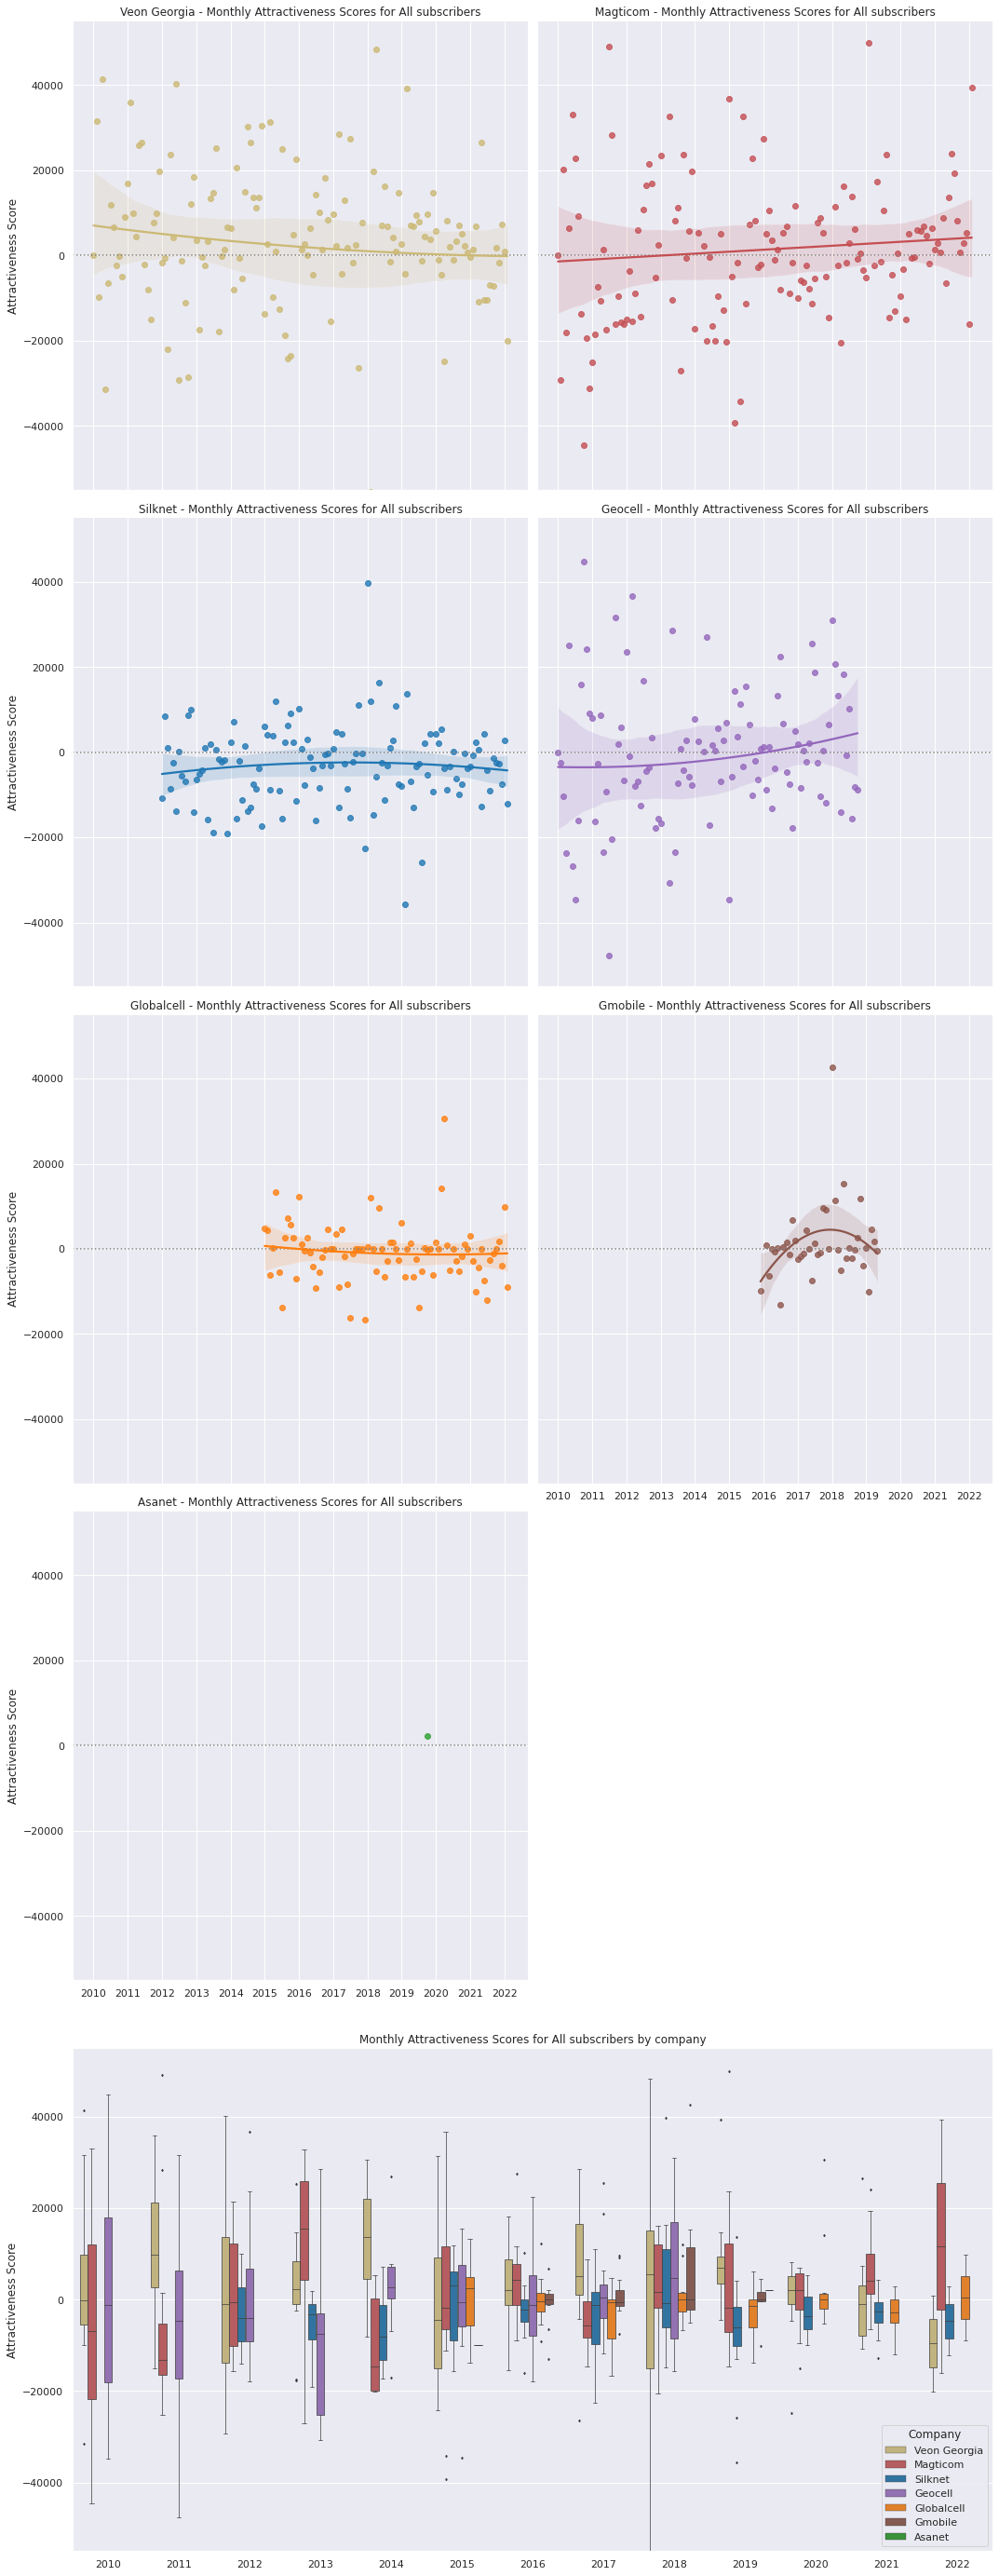

In [28]:
def plot_attractiveness_score_of_companies(df: pd.DataFrame, title: str):
    df = df.assign(MonthNum=lambda df: df['Month'].astype(int),
                   Year=lambda df: [x.year for x in df['Month']])
    df = compute_attractiveness_score(df)
    
    companies = [
        company for company in company_name_list
        if company in df['Company'].unique()]
    company_color_palette = [
        company_colors[company] for company in company_name_list
        if company in companies]
    
    grid = sns.FacetGrid(df, col="Company", hue="Company", col_order=companies,
                         hue_order=companies, palette=company_color_palette,
                         col_wrap=2, height=7.5)
    grid.refline(y=0, linestyle=":")  # Draw a horizontal line at zero
    grid.map(sns.regplot, 'MonthNum', 'AttractivenessScore', marker='o',
             order=2, ci=98)
    grid.set_titles(col_template=f"{{col_name}} - {title}",
                    row_template="{row_name}")
    grid.set(
        ylabel='Attractiveness Score',
        xticks=years_df['MonthNum'], xticklabels=years_df['Year'], xlabel='',
        ylim=(-55000, 55000)
    )
    grid.fig.tight_layout(w_pad=1)
    # Add additional axis to plot boxplot in the end:
    grid.figure.add_axes([0.075, -0.27, 0.915, 0.25])
    ax = sns.boxplot(data=df, x='Year', y='AttractivenessScore',
                     hue='Company', hue_order=companies,
                     palette=company_color_palette,
                     linewidth=0.7, fliersize=1.7)
    ax.set_title(f"{title} by company")
    ax.set(
        ylabel='Attractiveness Score',
        xlabel='',
        ylim=(-55000, 55000)
    )
    plt.show()


plot_attractiveness_score_of_companies(
    all_df, "Monthly Attractiveness Scores for All subscribers")

## Monthly Scores for Legal Entity subscribers

In [29]:
display(compute_attractiveness_score(
    legal_entities_df)['AttractivenessScore'].describe())

count       608.000000
mean        122.907280
std       12269.675349
min     -135937.797389
25%       -2536.133414
50%        -262.757392
75%        2240.071951
max      105826.940724
Name: AttractivenessScore, dtype: float64

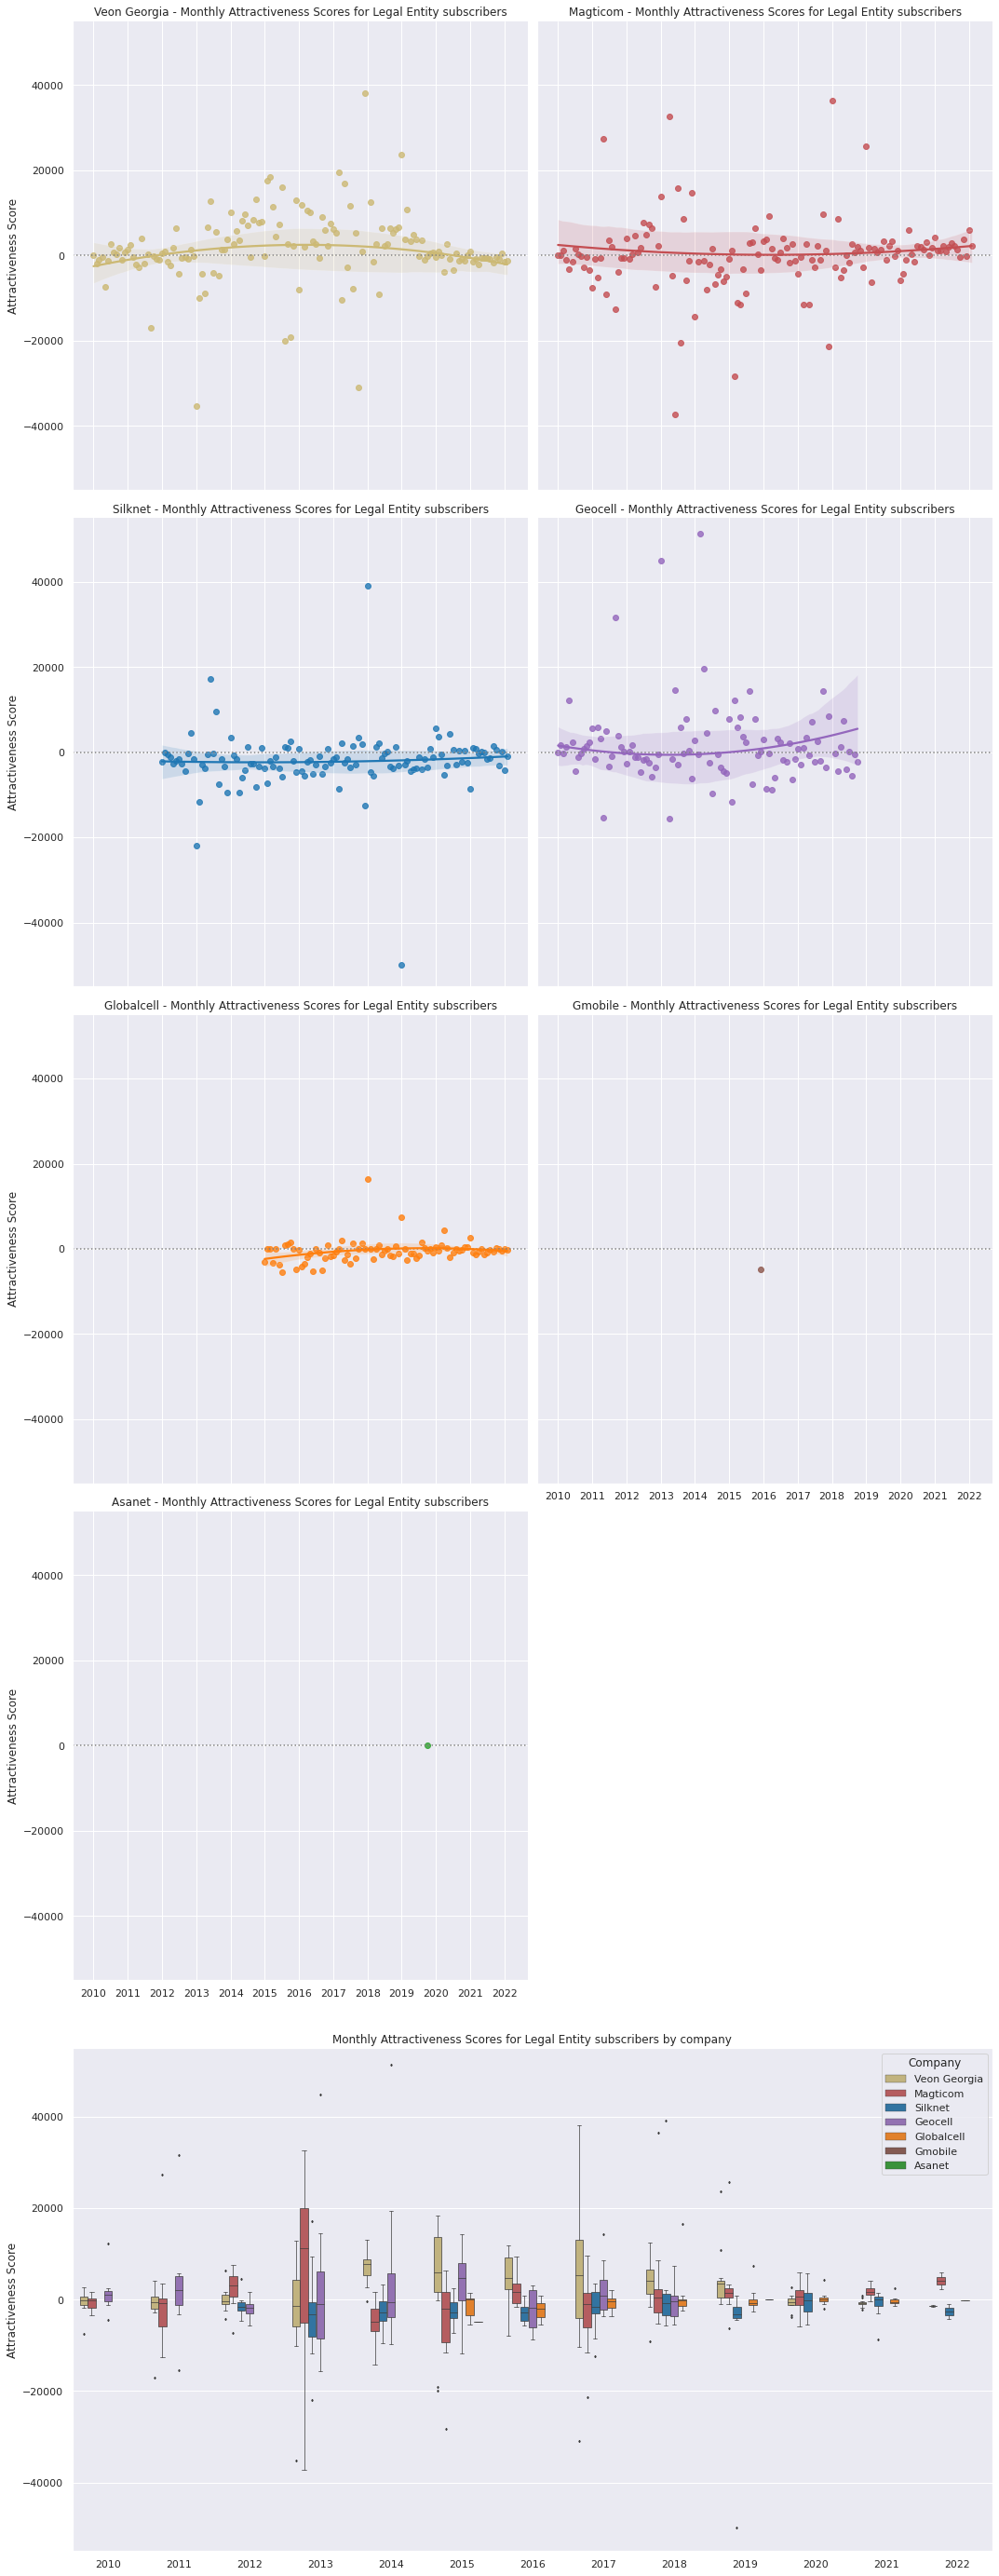

In [30]:
plot_attractiveness_score_of_companies(
    legal_entities_df,
    "Monthly Attractiveness Scores for Legal Entity subscribers")

## Monthly Scores for Natural Person subscribers

In [31]:
display(compute_attractiveness_score(
    natural_persons_df)['AttractivenessScore'].describe())

count      646.000000
mean        57.866318
std      13140.832671
min     -70452.871477
25%      -6092.321398
50%         -1.850429
75%       5634.597747
max      48164.333101
Name: AttractivenessScore, dtype: float64

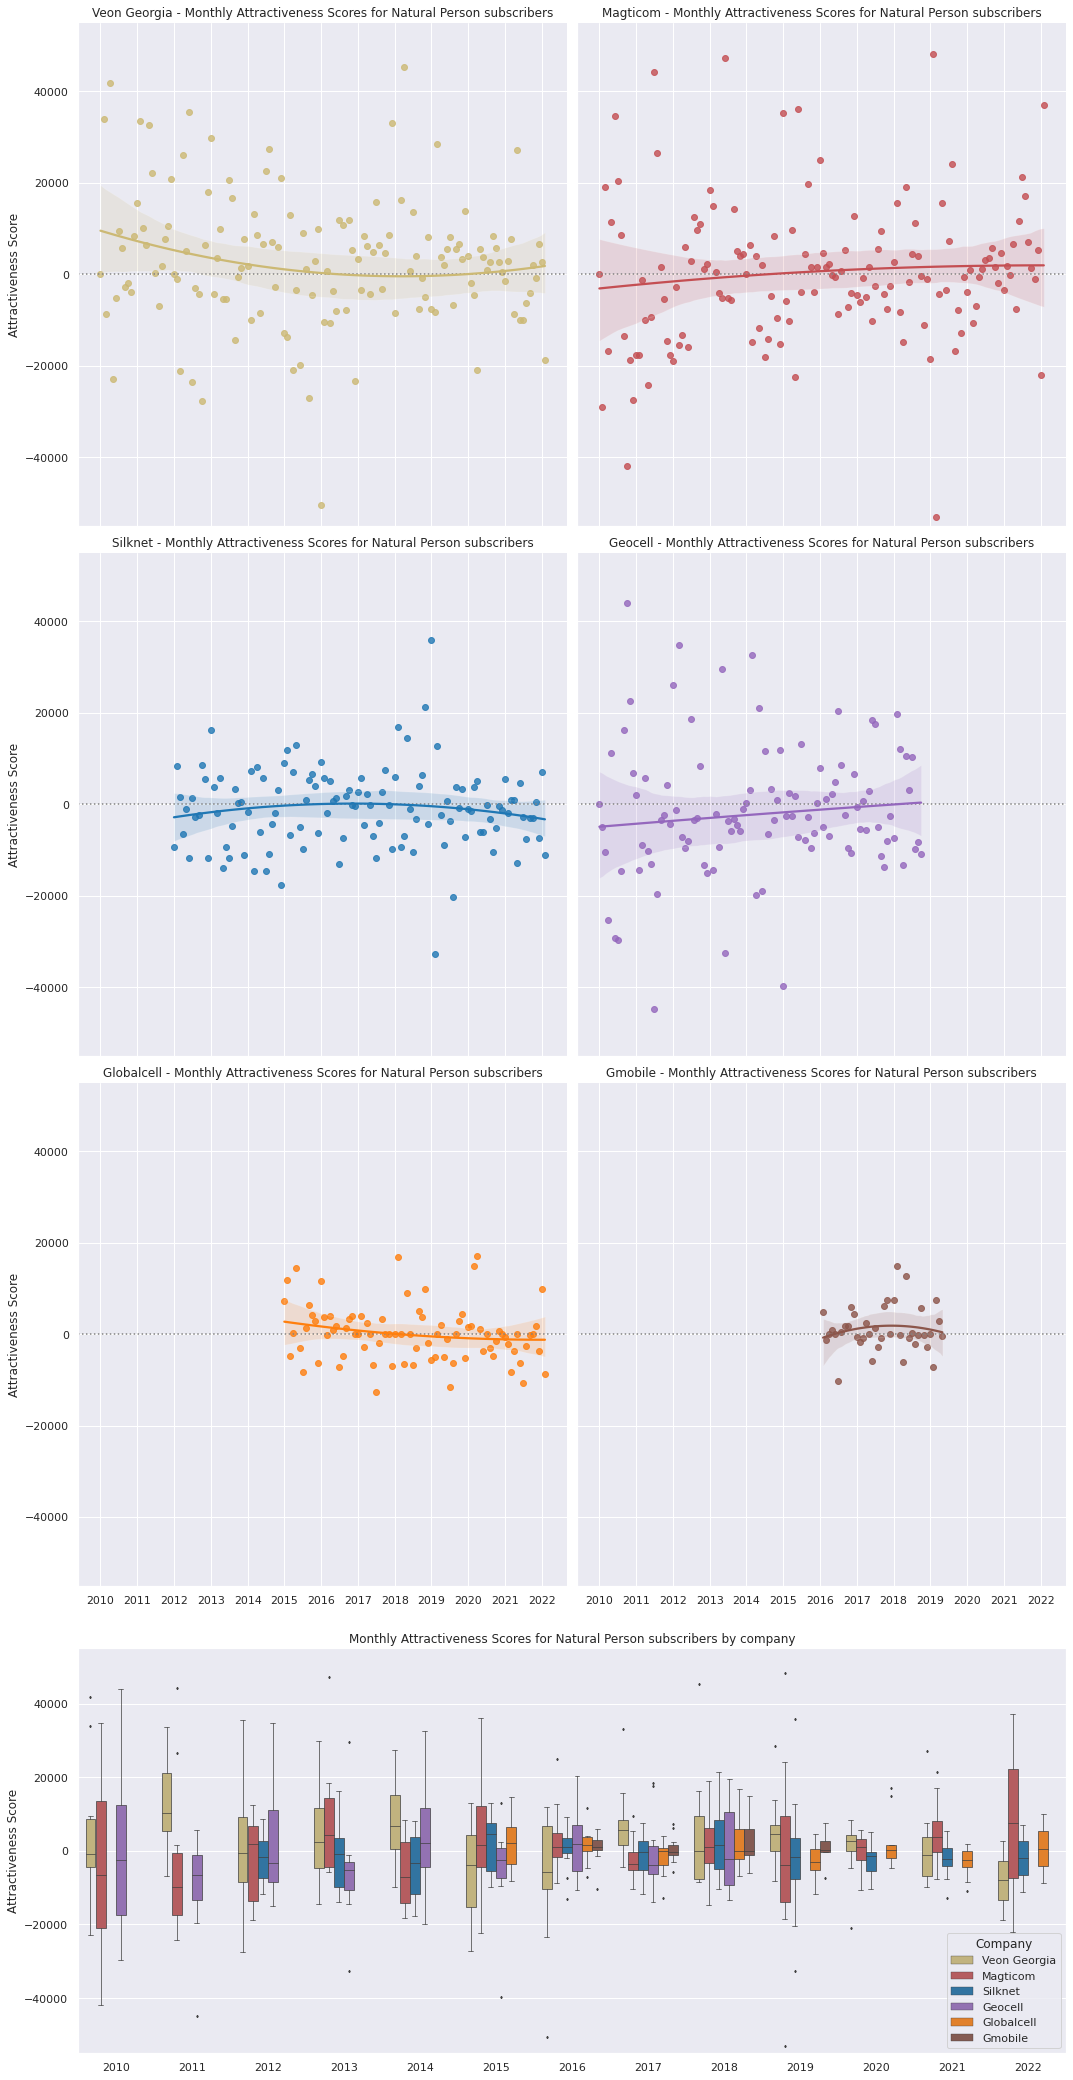

In [32]:
plot_attractiveness_score_of_companies(
    natural_persons_df,
    "Monthly Attractiveness Scores for Natural Person subscribers")

# Yearly Attractiveness Scores of Companies

## Yearly Scores for All subscribers


Yearly Attractiveness Scores of companies for All subscribers:



Company                             AttractivenessScore  \
Place             1             2             3                   1   
Year                                                                  
2010   Veon Georgia       Geocell      Magticom        45362.083982   
2011   Veon Georgia      Magticom       Geocell       131984.657940   
2012       Magticom       Geocell  Veon Georgia        12136.594211   
2013       Magticom  Veon Georgia       Silknet       276248.323637   
2014   Veon Georgia       Geocell       Silknet       153741.442115   
2015       Magticom    Globalcell       Silknet        11834.482137   
2016       Magticom    Globalcell       Geocell        52927.240468   
2017   Veon Georgia       Geocell       Gmobile       132636.468918   
2018       Magticom       Gmobile       Geocell        82995.183958   
2019   Veon Georgia        Asanet      Magticom       100520.205002   
2020     Globalcell      Magticom  Veon Georgia        33395.204569   
2021       Magticom  Veon Georgia       Silknet        81731.975640   
2022       Magticom    Globalcell       Silknet        23383.519692   

                                    
Place              2             3  
Year                                
2010     4856.801673 -63840.835359  
2011   -57561.318275 -70160.992134  
2012    10839.125704   4863.307230  
2013    30273.915515 -71402.706360  
2014   115931.736293 -82111.949335  
2015     8480.221206   1293.094662  
2016    -1778.601784  -5913.157603  
2017    20202.770120   9713.357893  
2018    70269.224326  46335.943660  
2019     2197.154207   1197.475701  
2020     4339.903478   3196.041334  
2021    -3725.224280 -36470.176832  
2022      854.293360  -9328.489339

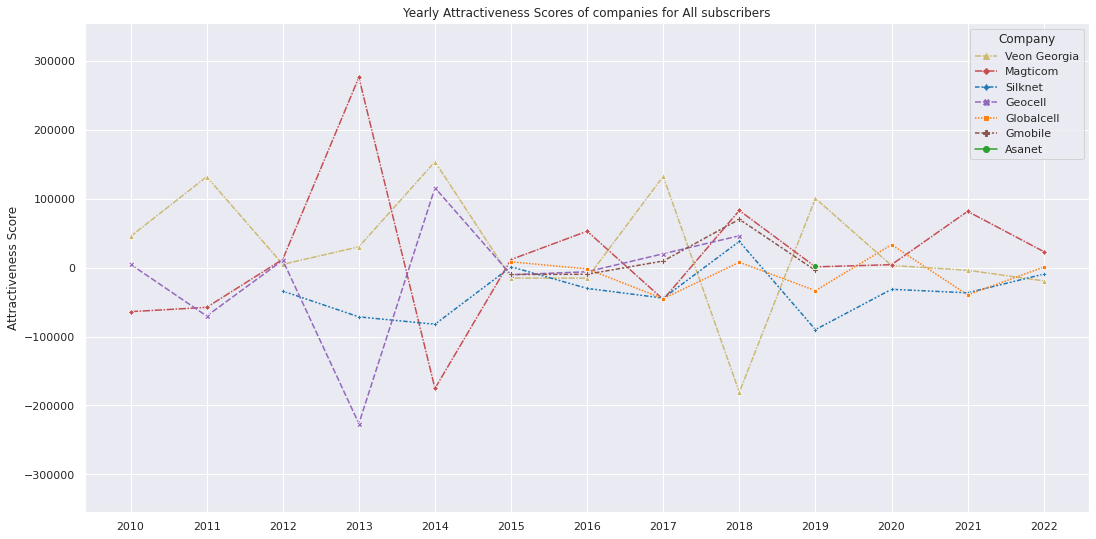

In [33]:
def get_top_3_companies_per_year(df: pd.DataFrame) -> pd.DataFrame:
    df = df.assign(
        MonthNum=lambda df: df['Month'].astype(int),
        Year=lambda df: [x.year for x in df['Month']],
    )
    
    df = (compute_attractiveness_score(df)
          .groupby(['Company', 'Year'])
          .aggregate({'AttractivenessScore': 'sum'}).reset_index()
          .groupby('Year')
          .apply(lambda df: (df
                             .sort_values('AttractivenessScore',
                                          ascending=False)
                             .head(3)
                             .reset_index(drop=True)))
          .reset_index(level=1).rename({'level_1': 'Place'}, axis=1)
          .pivot('Year', 'Place').rename({0: 1, 1: 2, 2: 3}, axis=1)
    )
    return df


def plot_yearly_attractiveness_score_of_companies(df: pd.DataFrame,
                                                  title: str):
    df = df.assign(
        MonthNum=lambda df: df['Month'].astype(int),
        Year=lambda df: [x.year for x in df['Month']]
    )
    df = compute_attractiveness_score(df)
    df = (df.groupby(['Company', 'Year'])
          .aggregate({'AttractivenessScore': 'sum'}).reset_index())
    
    companies = [
        company for company in company_name_list
        if company in df['Company'].unique()]
    company_color_palette = [
        company_colors[company] for company in company_name_list
        if company in companies]
    
    fig = plt.figure(figsize=(18, 9))
    ax = sns.lineplot(data=df, x='Year', y='AttractivenessScore',
                      hue='Company', hue_order=companies,
                      palette=company_color_palette,
                      style='Company', markers=True)
    ax.set(
        ylabel='Attractiveness Score',
        xticks=years_df['Year'], xticklabels=years_df['Year'], xlabel='',
        ylim=(-355000, 355000)
    )
    plt.title(title)
    plt.show()
    plt.close(fig)


title = "Yearly Attractiveness Scores of companies for All subscribers"
print(f'\n{title}:\n')
display(get_top_3_companies_per_year(all_df))
plot_yearly_attractiveness_score_of_companies(all_df, title)


## Yearly Scores for Legal Entity subscribers


Yearly Attractiveness Scores of companies for Legal Entity subscribers:



Company                             AttractivenessScore  \
Place             1             2             3                   1   
Year                                                                  
2010        Geocell  Veon Georgia      Magticom        16015.083230   
2011        Geocell      Magticom  Veon Georgia        35038.238082   
2012       Magticom  Veon Georgia       Silknet        32021.290422   
2013       Magticom  Veon Georgia       Silknet       190397.530087   
2014   Veon Georgia       Geocell       Silknet        84478.617926   
2015   Veon Georgia       Geocell       Gmobile        54016.232382   
2016   Veon Georgia      Magticom       Geocell        57131.393478   
2017   Veon Georgia       Geocell    Globalcell        52236.986105   
2018        Geocell      Magticom       Silknet        69153.218138   
2019   Veon Georgia      Magticom        Asanet        54390.024447   
2020       Magticom    Globalcell       Silknet         4486.802501   
2021       Magticom    Globalcell  Veon Georgia        21836.080569   
2022       Magticom    Globalcell  Veon Georgia         8245.535916   

                                   
Place             2             3  
Year                               
2010   -6592.335644  -9024.622081  
2011   -8047.902630 -17747.657414  
2012    1166.772836 -15008.081363  
2013  -35643.258459 -36776.163718  
2014   61890.963138 -33149.647736  
2015   42566.644955  -4849.277917  
2016   22946.183006 -25146.310677  
2017   26132.037937  -7363.107595  
2018   35778.728272  22243.376309  
2019   34327.040916     -0.456368  
2020    2923.260004  -1441.009696  
2021   -3386.336872  -8133.935355  
2022    -247.091267  -2759.755264

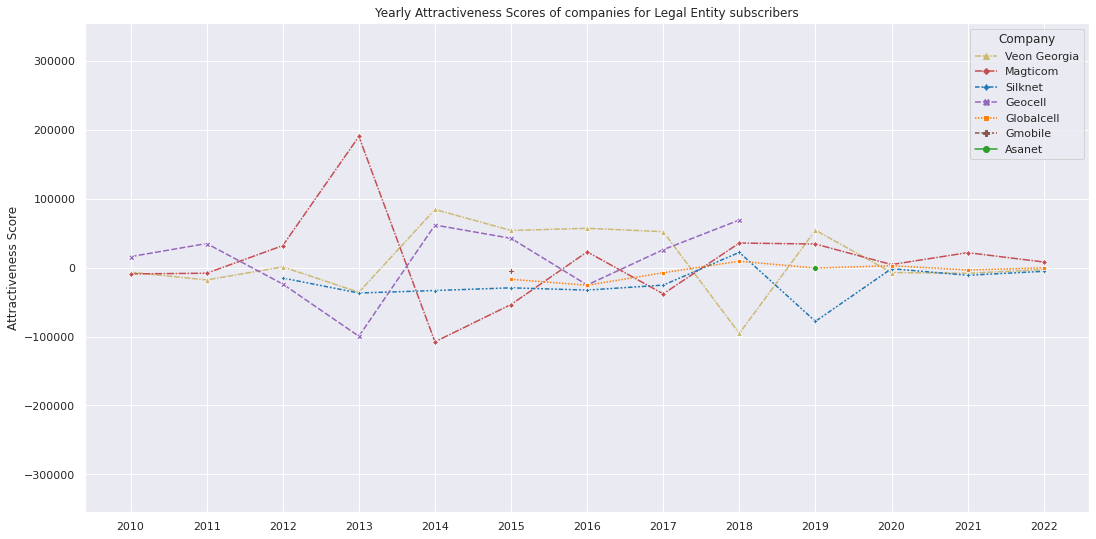

In [34]:
title = ("Yearly Attractiveness Scores of companies "
         "for Legal Entity subscribers")
print(f'\n{title}:\n')
display(get_top_3_companies_per_year(legal_entities_df))
plot_yearly_attractiveness_score_of_companies(legal_entities_df, title)

## Yearly Scores for Natural Person subscribers


Yearly Attractiveness Scores of companies for Natural Person subscribers:



Company                             AttractivenessScore  \
Place             1             2             3                   1   
Year                                                                  
2010        Geocell  Veon Georgia      Magticom        16015.083230   
2011        Geocell      Magticom  Veon Georgia        35038.238082   
2012       Magticom  Veon Georgia       Silknet        32021.290422   
2013       Magticom  Veon Georgia       Silknet       190397.530087   
2014   Veon Georgia       Geocell       Silknet        84478.617926   
2015   Veon Georgia       Geocell       Gmobile        54016.232382   
2016   Veon Georgia      Magticom       Geocell        57131.393478   
2017   Veon Georgia       Geocell    Globalcell        52236.986105   
2018        Geocell      Magticom       Silknet        69153.218138   
2019   Veon Georgia      Magticom        Asanet        54390.024447   
2020       Magticom    Globalcell       Silknet         4486.802501   
2021       Magticom    Globalcell  Veon Georgia        21836.080569   
2022       Magticom    Globalcell  Veon Georgia         8245.535916   

                                   
Place             2             3  
Year                               
2010   -6592.335644  -9024.622081  
2011   -8047.902630 -17747.657414  
2012    1166.772836 -15008.081363  
2013  -35643.258459 -36776.163718  
2014   61890.963138 -33149.647736  
2015   42566.644955  -4849.277917  
2016   22946.183006 -25146.310677  
2017   26132.037937  -7363.107595  
2018   35778.728272  22243.376309  
2019   34327.040916     -0.456368  
2020    2923.260004  -1441.009696  
2021   -3386.336872  -8133.935355  
2022    -247.091267  -2759.755264

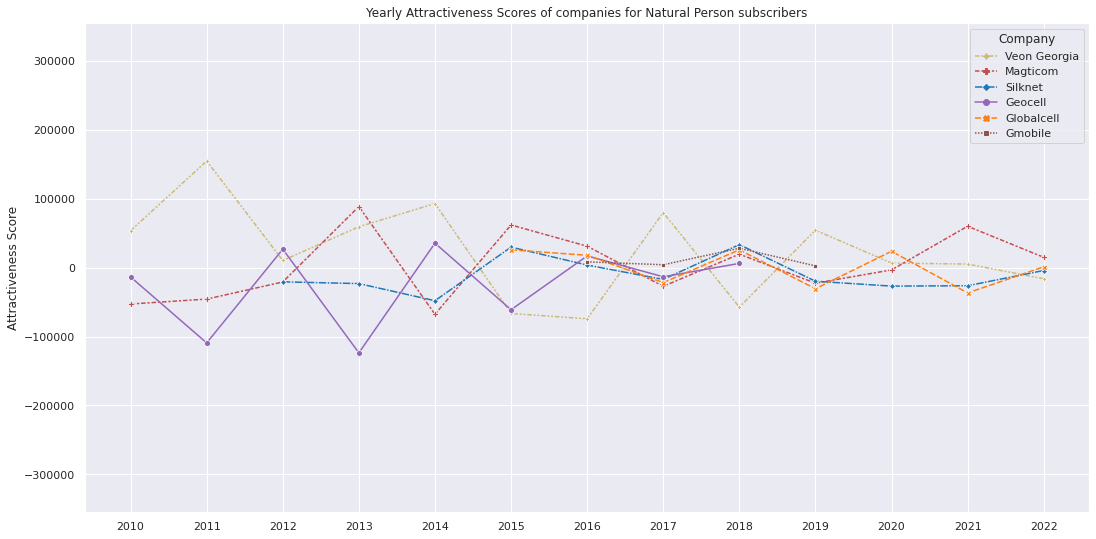

In [35]:
title = ("Yearly Attractiveness Scores of companies "
         "for Natural Person subscribers")
print(f'\n{title}:\n')
display(get_top_3_companies_per_year(legal_entities_df))
plot_yearly_attractiveness_score_of_companies(natural_persons_df, title)

# Top Companies by Attractiveness Score

In [36]:
def get_top_companies_per_year(df: pd.DataFrame, name: str) -> pd.DataFrame:
    return (get_top_3_companies_per_year(df)
            .loc[:,[('Company',1)]].T.reset_index(drop=True).T
            .rename({0:name}, axis=1))


def extract_available_months(df: pd.DataFrame) -> pd.DataFrame:
    return (df
            .assign(
                MonthName=lambda df: [x.month_name() for x in df['Month']],
                Year=lambda df: [x.year for x in df['Month']],
            )
            .groupby('Year')
            .apply(lambda df: pd.DataFrame({
                "Months": [
                    ' - '.join((lambda m: [m[0], m[-1]] if len(m) > 1 else m)(
                        df['MonthName'].unique()
                    ))
                ]
            })).reset_index()
           ).set_index('Year').filter(['Months'])


print("\nTop Mobile Communication Companies in Georgia "
      "by Attractiveness Score per year:\n")
top_companies_df = get_top_companies_per_year(all_df,
                                              "For All subscribers").join(
    get_top_companies_per_year(legal_entities_df,
                               "For Legal Entity subscribers")
).join(
    get_top_companies_per_year(natural_persons_df,
                               "For Natural Person subscribers")
).join(
    extract_available_months(all_df)
).reset_index().set_index(['Months', 'Year'])
display(top_companies_df)

for category in ('For All subscribers', 'For Legal Entity subscribers',
                 'For Natural Person subscribers'):
    print(f'{category} during the '
          f'{top_companies_df.loc["January - December"].index.min()}'
          f' – {top_companies_df.loc["January - December"].index.max()} years '
          'the following companies held the yearly top spot:')
    
    for company,count in top_companies_df.loc['January - December',
                                              category
                                             ].value_counts().iteritems():
        company = '"{}"'.format(company)
        print(f' - {company:<16} {count:} {"times" if count > 1 else "time"}.')
    print()


Top Mobile Communication Companies in Georgia by Attractiveness Score per year:



For All subscribers For Legal Entity subscribers  \
Months             Year                                                    
January - December 2010        Veon Georgia                      Geocell   
                   2011        Veon Georgia                      Geocell   
                   2012            Magticom                     Magticom   
                   2013            Magticom                     Magticom   
                   2014        Veon Georgia                 Veon Georgia   
                   2015            Magticom                 Veon Georgia   
                   2016            Magticom                 Veon Georgia   
                   2017        Veon Georgia                 Veon Georgia   
                   2018            Magticom                      Geocell   
                   2019        Veon Georgia                 Veon Georgia   
                   2020          Globalcell                     Magticom   
                   2021            Magticom                     Magticom   
January - February 2022            Magticom                     Magticom   

                        For Natural Person subscribers  
Months             Year                                 
January - December 2010                   Veon Georgia  
                   2011                   Veon Georgia  
                   2012                        Geocell  
                   2013                       Magticom  
                   2014                   Veon Georgia  
                   2015                       Magticom  
                   2016                       Magticom  
                   2017                   Veon Georgia  
                   2018                        Silknet  
                   2019                   Veon Georgia  
                   2020                     Globalcell  
                   2021                       Magticom  
January - February 2022                       Magticom

For All subscribers during the 2010 – 2021 years the following companies held the yearly top spot:
 - "Magticom"       6 times.
 - "Veon Georgia"   5 times.
 - "Globalcell"     1 time.

For Legal Entity subscribers during the 2010 – 2021 years the following companies held the yearly top spot:
 - "Veon Georgia"   5 times.
 - "Magticom"       4 times.
 - "Geocell"        3 times.

For Natural Person subscribers during the 2010 – 2021 years the following companies held the yearly top spot:
 - "Veon Georgia"   5 times.
 - "Magticom"       4 times.
 - "Geocell"        1 time.
 - "Silknet"        1 time.
 - "Globalcell"     1 time.



In [37]:
print(f"\n ** Total Elapsed time: {datetime.utcnow() - nb_st} ** \n")
print(f"Notebook END time: {datetime.utcnow()} UTC\n")


 ** Total Elapsed time: 0:00:16.164122 ** 

Notebook END time: 2022-06-16 10:39:48.868241 UTC




*This notebook is originally published under the Apache License (Version 2.0) at the following GitHub repository: [sentinel-1/mobile_subscribers_Georgia](https://github.com/sentinel-1/mobile_subscribers_Georgia)*

For the issues, feedback or suggestions regarding the original notebook (if any) feel free to open an issue at the corresponding [Issues page of the repository](https://github.com/sentinel-1/mobile_subscribers_Georgia/issues)